# Descriptives
___

<b> import modules </b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import numpy as np

<b> left align all markdown tables </b>

In [2]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

<b> read csv file to a pandas dataframe </b>

In [3]:
df = pd.read_csv("data/online_shoppers_intention.csv")

<b> Number of rows, number of columns in dataset </b>

In [4]:
print('There are # number of rows in the dataset    :', df.shape[0])
print('There are # number of columns in the dataset :', df.shape[1])

There are # number of rows in the dataset    : 12330
There are # number of columns in the dataset : 18


| **# Rows** | **# Features** |
|----------|--------------|
| 12330    | 18           |


<b> Features datatypes and non-null </b>

In [5]:
# df.info()
# convert table to markdown, source: https://tableconvert.com/

| Variable                 | # values            |  Data Type |
|--------------------------|--------------------|---------|
| Administrative           | 12330    non\-null | int64   |
| Administrative\_Duration | 12330    non\-null | float64 |
| Informational            | 12330    non\-null | int64   |
| Informational\_Duration  | 12330    non\-null | float64 |
| ProductRelated           | 12330    non\-null | int64   |
| ProductRelated\_Duration | 12330    non\-null | float64 |
| BounceRates              | 12330    non\-null | float64 |
| ExitRates                | 12330    non\-null | float64 |
| PageValues               | 12330    non\-null | float64 |
| SpecialDay               | 12330    non\-null | float64 |
| Month                    | 12330    non\-null | object  |
| OperatingSystems         | 12330    non\-null | int64   |
| Browser                  | 12330    non\-null | int64   |
| Region                   | 12330    non\-null | int64   |
| TrafficType              | 12330    non\-null | int64   |
| VisitorType              | 12330    non\-null | object  |
| Weekend                  | 12330    non\-null | bool    |
| Revenue                  | 12330    non\-null | bool    |


## Take-Away
* All features and the target variable have no null values

<b> Features grouped by data type </b>

In [6]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('bool'): Index(['Weekend', 'Revenue'], dtype='object'),
 dtype('int64'): Index(['Administrative', 'Informational', 'ProductRelated', 'OperatingSystems',
        'Browser', 'Region', 'TrafficType'],
       dtype='object'),
 dtype('float64'): Index(['Administrative_Duration', 'Informational_Duration',
        'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
        'SpecialDay'],
       dtype='object'),
 dtype('O'): Index(['Month', 'VisitorType'], dtype='object')}

<b> Show first 5 rows of the dataset </b>

In [7]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Take-Away
* Month, VisitorType are strings, need to be recoded
* Weekend and Revenue are Boolean (True/False)
* Other features are numerical
* There appear to be zero's in a lot of features

<b> Descriptive Statistics </b>

In [8]:
df.describe().round(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00
mean,2.32,80.82,0.50,34.47,31.73,1194.75,0.02,0.04,5.89,0.06,2.12,2.36,3.15,4.07
std,3.32,176.78,1.27,140.75,44.48,1913.67,0.05,0.05,18.57,0.20,0.91,1.72,2.40,4.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,0.00,7.00,184.14,0.00,0.01,0.00,0.00,2.00,2.00,1.00,2.00
50%,1.00,7.50,0.00,0.00,18.00,598.94,0.00,0.03,0.00,0.00,2.00,2.00,3.00,2.00
75%,4.00,93.26,0.00,0.00,38.00,1464.16,0.02,0.05,0.00,0.00,3.00,2.00,4.00,4.00
max,27.00,3398.75,24.00,2549.38,705.00,63973.52,0.20,0.20,361.76,1.00,8.00,13.00,9.00,20.00


## Take-Aways
* There appears to be a high standard deviation for the duration of Administrative, Informational and ProductRelated features
* ExitRates and BounceRates have a low mean (close to zero) and the same standard deviation

<b> Unique elements for categorical features </b>

_create a function to print the unique values for a list of columns_

In [9]:
def feature_unique_values(df_name, lst_columns):
    print('***********************************************************************************')
    print('                    Unique values for Categorical Feature(s):')
    print('***********************************************************************************')
    for i in df_name[lst_columns]:
        list_unique_values = df_name[i].unique()
        list_unique_values.sort()
        length_list = len(list_unique_values)
        print(i, ':', list_unique_values, '\n', '- Unique Values:', length_list)
    print('***********************************************************************************')

_define list of features to use in function and apply function_

In [10]:
lst_features = ['Month', 'Weekend', 'SpecialDay', 'VisitorType', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
feature_unique_values(df_name=df, lst_columns=lst_features)

***********************************************************************************
                    Unique values for Categorical Feature(s):
***********************************************************************************
Month : ['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep'] 
 - Unique Values: 10
Weekend : [False  True] 
 - Unique Values: 2
SpecialDay : [0.  0.2 0.4 0.6 0.8 1. ] 
 - Unique Values: 6
VisitorType : ['New_Visitor' 'Other' 'Returning_Visitor'] 
 - Unique Values: 3
OperatingSystems : [1 2 3 4 5 6 7 8] 
 - Unique Values: 8
Browser : [ 1  2  3  4  5  6  7  8  9 10 11 12 13] 
 - Unique Values: 13
Region : [1 2 3 4 5 6 7 8 9] 
 - Unique Values: 9
TrafficType : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
 - Unique Values: 20
***********************************************************************************


<b> Features - Zero's & NaN's </b>

_Create a function that creates a dataframe with Zero's and NaN's_

In [11]:
def function_missing(df):
    # Count NaN's
    list_nan = df.isna().sum()

    # Percentage of missing values for each column (To see the amount of usable data for each column and infer the effect replacing NaN's will have by some metric in part 2)
    list_nan_pct = df.isna().mean().round(4) * 100

    # Calculate the sum of the number of times a zero appears in a feature 
    list_zeros = df.isin([0]).sum()

    # Calculate a % of the number of times a zero appears in a feature
    list_zeros_pct = df.isin([0]).mean().round(4) * 100

    # create a dataframe showing the missing and percentage that is missing
    df_combined = pd.concat([list_nan.rename('# NaNs'), list_zeros.rename('# Zeros'), list_nan_pct.rename('% NaNs'), list_zeros_pct.rename('% Zeros')], axis=1)
    
    return(df_combined)

_Apply function to dataframe_

In [12]:
function_missing(df=df)

,# NaNs,# Zeros,% NaNs,% Zeros
Administrative,0,5768,0.0,46.78
Administrative_Duration,0,5903,0.0,47.88
Informational,0,9699,0.0,78.66
Informational_Duration,0,9925,0.0,80.49
ProductRelated,0,38,0.0,0.31
ProductRelated_Duration,0,755,0.0,6.12
BounceRates,0,5518,0.0,44.75
ExitRates,0,76,0.0,0.62
PageValues,0,9600,0.0,77.86
SpecialDay,0,11079,0.0,89.85


In [13]:
# recalculate % false and true for target variavle Revenue
df['Revenue'].value_counts()
total_obs_rev = df['Revenue'].count()
total_obs_rev_false = df['Revenue'].value_counts()[0]
total_obs_rev_true = df['Revenue'].value_counts()[1]
perc_false = round(total_obs_rev_false/total_obs_rev*100, 2)
perc_true = round(total_obs_rev_true/total_obs_rev*100, 2)

print('Revenue, % False:', perc_false)
print('Revenue, % True:', perc_true)

Revenue, % False: 84.53
Revenue, % True: 15.47


# Visualize Dataset
___

## 1. Barcharts

<b> Visualize target variable: 'Revenue' </b>

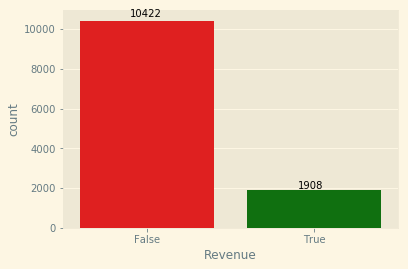

In [14]:
plt.style.use('Solarize_Light2')
graph = sns.countplot(df['Revenue'], palette=['red', 'green'])

# show the values above each bar in the barchart with relative position xy
for p in graph.patches:
    graph.annotate(np.round(p.get_height(), 2), (p.get_x() + 0.3, p.get_height() * 1.02))

Take-away Barchart:
--------------------
 - The target variable is highly imbalanced (as seen before: 84.53% is zero)

___
Visualize the following features:
* Administrative, Administrative_Duration
* Informational, Informational_Duration
* ProductRelated, ProductRelated_Duration

In [15]:
df_pagesvisited = df[['Administrative', 'Informational', 'ProductRelated']]
df_pagesvisited_mean = df_pagesvisited.mean()

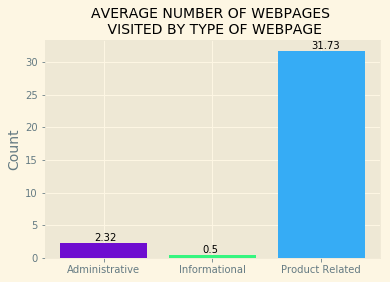

In [16]:
objects = ('Administrative', 'Informational', 'Product Related')
x = np.arange(len(objects))
y = df_pagesvisited_mean.round(2)
# show available styles in matplotlib
# plt.style.available 
# set the style of the graph
plt.style.use('Solarize_Light2')
# define the barchart and colors (in hex color codes)
plt.bar(x, height=y, align='center', color=('#6e0dd0', '#36F57F', '#36ACF5'))
# define the xticks
plt.xticks(x, objects)
# set the barchart y-label
plt.ylabel('Count', fontsize=14)
# set the barchart title
plt.title('AVERAGE NUMBER OF WEBPAGES \n VISITED BY TYPE OF WEBPAGE', fontsize=14)
# show the values above each bar in the barchart with relative position
for i, v in enumerate(y):
    plt.text(x[i] - 0.09, v + 0.3, str(v))
# show the barchart
plt.show()

Take-aways Barchart:
--------------------
 - The lowest average number of webpages visited by type of webpage for users are: <b> Informational </b> Webpages (~2 webpages on average).
 - Followed closely by <b> Administrative </b> Webpages (~0.5 webpages on average by user).
 - Users visit on average the highest number of webpages that are <b> Product Related </b> (~32 webpages).

In [17]:
# create a new dataframe for just the duration types
df_duration = df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

# test how many values we have before filtering
df_duration.count()

# apply filter, excluding zeros
df_duration_nonzero = df[df_duration > 0][['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

# count the number of instances that are non-zero
df_duration_nonzero.count()

# calculate the average time spent by type of webpage (in minutes)
df_duration_nonzero_mean_minutes = df_duration_nonzero.mean()/60
df_duration_nonzero_mean_minutes

Administrative_Duration     2.584133
Informational_Duration      2.945562
ProductRelated_Duration    21.211261
dtype: float64

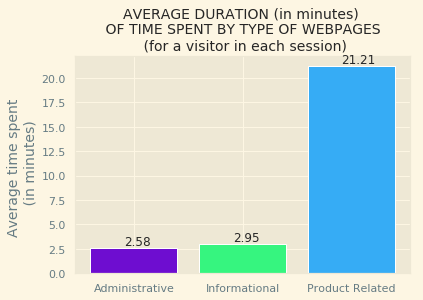

In [88]:
objects = ('Administrative', 'Informational', 'Product Related')

x = np.arange(len(objects))
y = df_duration_nonzero_mean_minutes.round(2)
# show available styles in matplotlib
# plt.style.available 
# set the style of the graph
plt.style.use('Solarize_Light2')
# define the barchart and colors (in hex color codes)
plt.bar(x, height=y, align='center', color=('#6e0dd0', '#36F57F', '#36ACF5'))
# define the xticks
plt.xticks(x, objects)
# set the barchart y-label
plt.ylabel('Average time spent \n (in minutes)', fontsize=14)
# set the barchart title
plt.title('AVERAGE DURATION (in minutes) \n OF TIME SPENT BY TYPE OF WEBPAGES \n (for a visitor in each session)', fontsize=14)
# show the values above each bar in the barchart with relative position
for i, v in enumerate(y):
    plt.text(x[i] - 0.09, v + 0.3, str(v))
# show the barchart
plt.show()

Take-aways Barchart:
--------------------
 - The lowest average duration spent by type of webpages is: <b> Administrative </b> (~2.6 minutes).
 - Followed closely by <b> Informational </b> (~3.0 minutes).
 - Users spent on average by far the highest amount of time at <b> Product Related </b> webpages (~21.2 minutes).

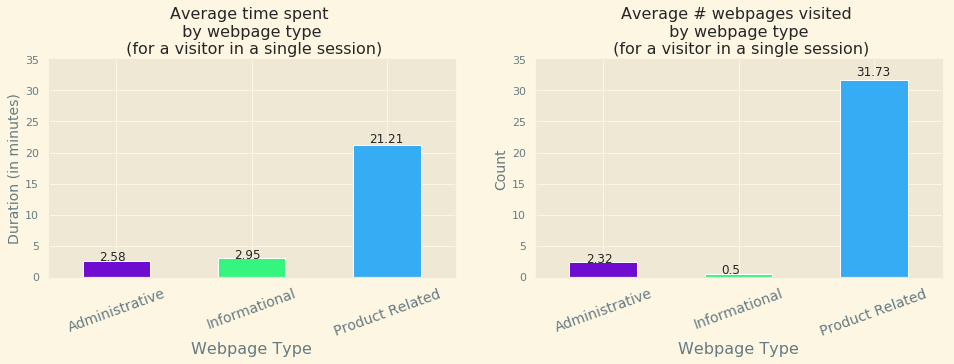

In [89]:
# show 2 plots side by side
df1 = df_duration_nonzero_mean_minutes
df2 = df_pagesvisited_mean

# define 3 colors for 3 bars
my_colors = ['#6e0dd0', '#36F57F', '#36ACF5']

# Define size subplots
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))  # 1 row, 2 columns

# Graph 1 
graph1 = df1.plot(kind='bar', ax=ax1, title='Average time spent \n by webpage type \n (for a visitor in a single session)', rot=20, color=my_colors)
graph1.set_xlabel("Webpage Type", fontsize=16)
graph1.set_ylabel("Duration (in minutes)", fontsize=14)
graph1.set_xticklabels(['Administrative', 'Informational', 'Product Related'], fontsize=14)
graph1.set_yticks(range(0, 36), 5)
# show the values above each bar in the barchart with relative position xy
for p in graph1.patches:
    graph1.annotate(np.round(p.get_height(), 2), (p.get_x() +0.12, p.get_height() * 1.02))

# Graph 2
graph2 = df2.plot(kind='bar', ax=ax2, title='Average # webpages visited \n by webpage type \n (for a visitor in a single session)', rot=20, color=my_colors)
graph2.set_xticklabels(['Administrative', 'Informational', 'Product Related'],  fontsize=14)
graph2.set_xlabel('Webpage Type', fontsize=16)
graph2.set_ylabel('Count', fontsize=14)
graph2.set_yticks(range(0, 36), 5)

# show the values above each bar in the barchart with relative position xy
for p in graph2.patches:
    graph2.annotate(np.round(p.get_height(), 2), (p.get_x() + 0.12, p.get_height() * 1.02))

Take-aways:
--------------------
<b> Left-chart </b>
 - Users spent on average by far the highest amount of time at <b> Product Related </b> webpages (~21.2 minutes).

<b> Right-chart </b>
 - Users visit on average by far the most number of webpages that are <b> Product Related </b> (~32 webpages).

In [20]:
# get the non_zero values by type of webpage and count total
df_pagesvisited_count = df_pagesvisited.count()
df_pagesvisited_nonzero = df_pagesvisited[df_pagesvisited > 0]
df_pagesvisited_nonzero_count = df_pagesvisited_nonzero.count()
df_pagesvisited_nonzero_count

Administrative     6562
Informational      2631
ProductRelated    12292
dtype: int64

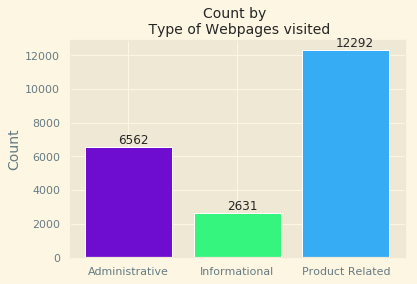

In [21]:
objects = ('Administrative', 'Informational', 'Product Related')

x = np.arange(len(objects))
y = df_pagesvisited_nonzero_count
# show available styles in matplotlib
# plt.style.available 
# set the style of the graph
plt.style.use('Solarize_Light2')
# define the barchart and colors (in hex color codes)
plt.bar(x, height=y, align='center', color=('#6e0dd0', '#36F57F', '#36ACF5'))
# define the xticks
plt.xticks(x, objects)
# set the barchart y-label
plt.ylabel('Count', fontsize=14)
# set the barchart title
plt.title('Count by \n Type of Webpages visited', fontsize=14)
# show the values above each bar in the barchart with relative position
for i, v in enumerate(y):
    plt.text(x[i] - 0.09, v + 200, str(v))
# show the barchart
plt.show()

___
Visualize the following features:
* BounceRates
* ExitRates
___

In [22]:
df_bounce_exit_rates = df[['BounceRates', 'ExitRates']]

# count the observations in each feature of admin, info, productrelated
print('# obs for BounceRates and ExitRates incl. zeros')
print('------------------------------------------------------')
print(df_bounce_exit_rates.count())
print('------------------------------------------------------')

# calculate the average for BounceRates and ExitRates
print('Averages for BounceRates and ExitRates')
print('------------------------------------------------------')
df_bounce_exit_rates_mean = df_bounce_exit_rates.mean()
df_bounce_exit_rates_mean

# obs for BounceRates and ExitRates incl. zeros
------------------------------------------------------
BounceRates    12330
ExitRates      12330
dtype: int64
------------------------------------------------------
Averages for BounceRates and ExitRates
------------------------------------------------------


BounceRates    0.022191
ExitRates      0.043073
dtype: float64

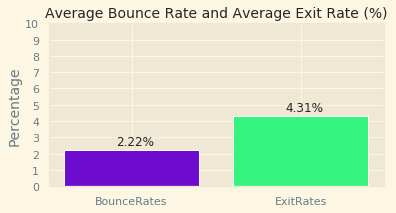

-------------------------------------------------------------
* Bounce Rate:
-------------------------------------------------------------
 % of visitors who enter site from the page & 
 leave that page ("bounce") without triggering any other requests 
 to the analytics server during that session
-------------------------------------------------------------
* Exit Rates:
-------------------------------------------------------------
For all pageviews to the page,  
 % of visitors that were the last in the session


In [23]:
fig= plt.figure(figsize=(6,3))
objects = ('BounceRates', 'ExitRates')

x = np.arange(len(objects))
y = (df_bounce_exit_rates_mean*100).round(2) # convert to percentage x100%
# show available styles in matplotlib
# plt.style.available 
# set the style of the graph
plt.style.use('Solarize_Light2')
# define the barchart and colors (in hex color codes)
plt.bar(x, height=y, align='center', color=('#6e0dd0', '#36F57F'))
# define the xticks
plt.xticks(x, objects)
# set the barchart y-label
plt.ylabel('Percentage', fontsize=14)
# set the barchart title
plt.title('Average Bounce Rate and Average Exit Rate (%)', fontsize=14)
plt.yticks(range(0, 11))
# show the values above each bar in the barchart with relative position
for i, v in enumerate(y):
    plt.text(x[i] - 0.09, v + 0.3, str(v)+'%')
# show the barchart
plt.show()

print('-------------------------------------------------------------')
print('* Bounce Rate:')
print('-------------------------------------------------------------')
print(' % of visitors who enter site from the page &', '\n',\
'leave that page ("bounce") without triggering any other requests', '\n', \
'to the analytics server during that session')
print('-------------------------------------------------------------')
print('* Exit Rates:')
print('-------------------------------------------------------------')
print('For all pageviews to the page, ', '\n', '% of visitors \
that were the last in the session')

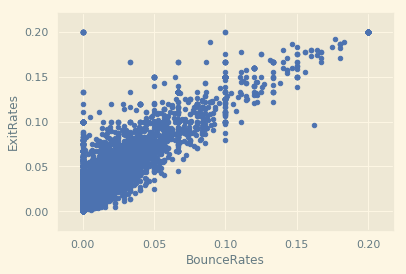

In [24]:
df.plot(kind='scatter', x='BounceRates', y='ExitRates')

## Take-away
* <b> ExitRates </b> and <b> BounceRates </b> appear to be highly positively correlated with a linear pattern.

## Special Day ##

___
Visualize the following feature:
* Special Day

In [25]:
special_day_counts = pd.DataFrame(df['SpecialDay'].value_counts())
special_day_counts.sort_index()

,SpecialDay
0.0,11079
0.2,178
0.4,243
0.6,351
0.8,325
1.0,154


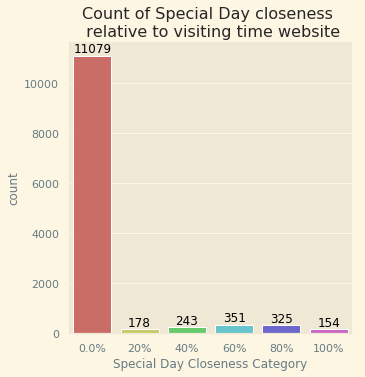

In [26]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="SpecialDay", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of Special Day closeness \n relative to visiting time website")
# set the x-label and fontsize
plt.xlabel('Special Day Closeness Category', fontsize=12)
# set the xticklabels
graph.set(xticklabels=['0.0%','20%','40%','60%','80%','100%'])
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

## Month ##

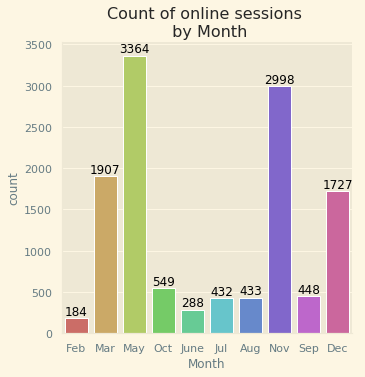

In [27]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="Month", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of online sessions \n by Month")
# set the x-label and fontsize
plt.xlabel('Month', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

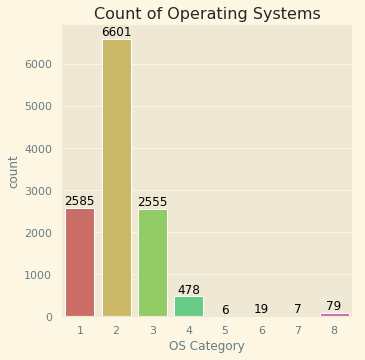

In [28]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="OperatingSystems", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of Operating Systems")
# set the x-label and fontsize
plt.xlabel('OS Category', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

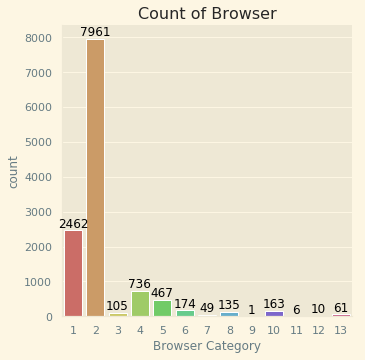

In [29]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="Browser", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of Browser")
# set the x-label and fontsize
plt.xlabel('Browser Category', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

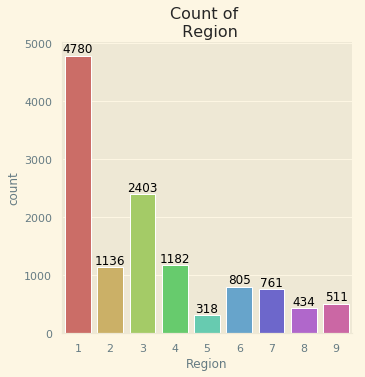

In [30]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="Region", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of \n Region")
# set the x-label and fontsize
plt.xlabel('Region', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

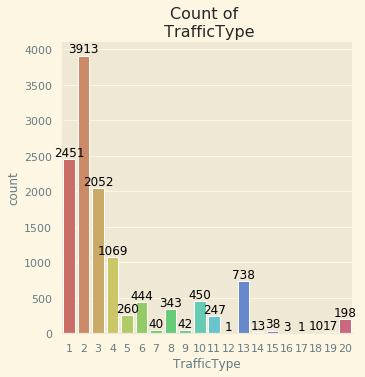

In [31]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="TrafficType", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of \n TrafficType")
# set the x-label and fontsize
plt.xlabel('TrafficType', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

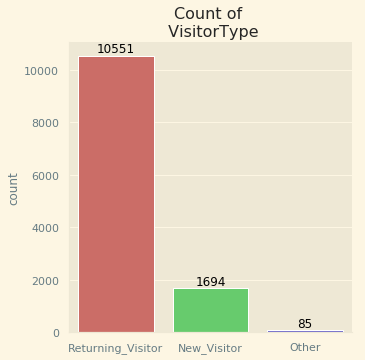

In [32]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="VisitorType", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of \n VisitorType")
# set the x-label and fontsize
plt.xlabel('', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

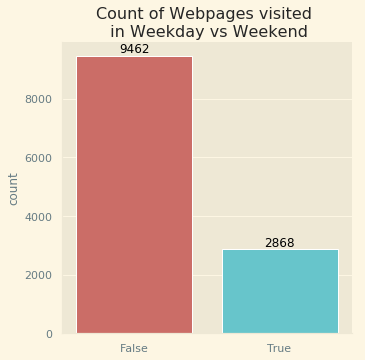

In [33]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="Weekend", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of Webpages visited \n in Weekday vs Weekend")
# set the x-label and fontsize
plt.xlabel('', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

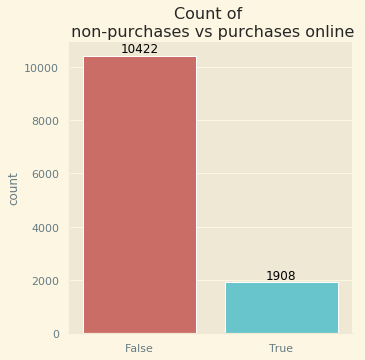

In [34]:
# plot the graph for the dataframe df and the feature SpecialDay by counting totals of each category
graph = sns.catplot(x="Revenue", kind="count", palette="hls", data=df)

# set the title
plt.title("Count of \n non-purchases vs purchases online")
# set the x-label and fontsize
plt.xlabel('', fontsize=12)
#annotate axis = seaborn axis
ax = graph.ax 

# show the values above each bar in the barchart with relative position
# source: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

## 2. Boxplots 

Administrative Webpages

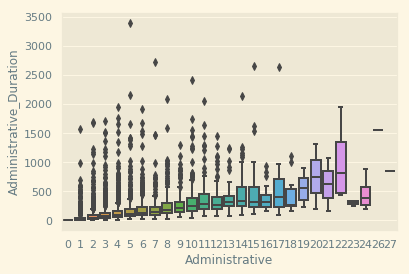

In [35]:
# show the number of administrative webpages visited and the time spent
ax = sns.boxplot(y="Administrative_Duration",x="Administrative", data=df)

Informational Webpages

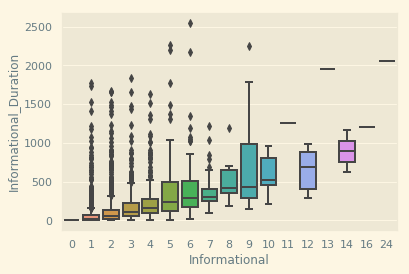

In [36]:
ax = sns.boxplot(y="Informational_Duration",x="Informational", data=df)

In [37]:
#ax = sns.boxplot(y="ProductRelated_Duration",x="ProductRelated", data=df)
#conclusion: boxplot ProductRelated vs ProductRelated_Duration not informative - too many datapoints

## Takeaways
* The more (Administrative, Informational) webpages visited in a session the longer the duration
* There appear to be a lot of outliers

## Scatterplot ##

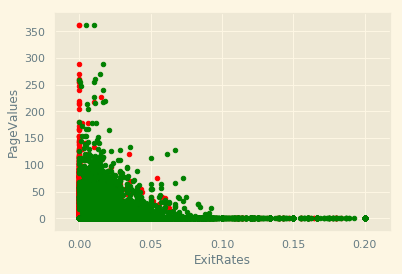

In [38]:
#df.plot(kind='scatter', x=['BounceRates','ExitRates'], y ='SpecialDay')
ax1 = df.plot(kind='scatter', x='BounceRates', y='PageValues', color='red')    
ax2 = df.plot(kind='scatter', x='ExitRates', y='PageValues', color='green', ax=ax1)    
#ax3 = df.plot(kind='scatter', x='e', y='f', color='b', ax=ax1)


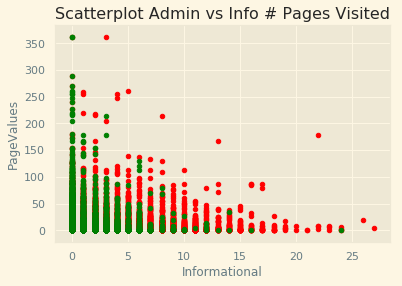

In [39]:
#df.plot(kind='scatter', x=['BounceRates','ExitRates'], y ='SpecialDay')
ax1 = df.plot(kind='scatter', x='Administrative', y='PageValues', color='red')    
ax2 = df.plot(kind='scatter', x='Informational', y='PageValues', color='green', ax=ax1, title='Scatterplot Admin vs Info # Pages Visited')   
#ax3 = df.plot(kind='scatter', x='ProductRelated', y='PageValues', color='b', ax=ax1)

## 3. Histograms 

In [40]:
# function for histogram
def plot_hist_norm(df, column, bin_amount=25):
    # Fit a normal distribution to the data:
    mu, std = norm.fit(df[column])

    # Plot the histogram.
    ## Set the alpha value used for blending (how transparent the color is)
    plt.hist(df[column], bins=bin_amount, density=True, alpha=0.8, color='g')
    
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = column, "Fit results: mu = %.2f, std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

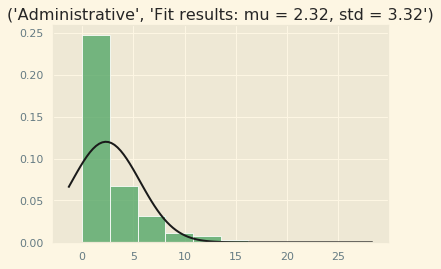

In [41]:
plot_hist_norm(df, column='Administrative', bin_amount=10)

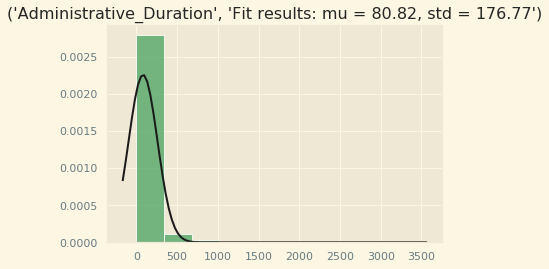

In [42]:
plot_hist_norm(df, column='Administrative_Duration', bin_amount=10)

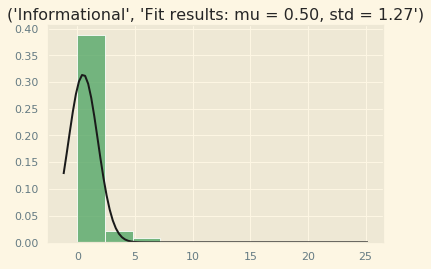

In [43]:
plot_hist_norm(df, column='Informational', bin_amount=10)

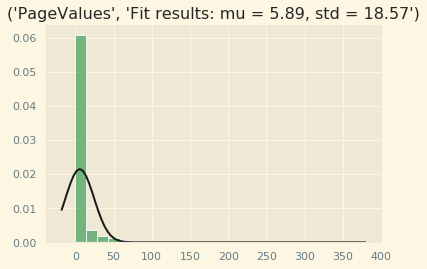

In [44]:
#df['PageValues'].describe()
plot_hist_norm(df, column='PageValues', bin_amount=25)

## Show Histograms as subplots ##

Text(0.5,0.98,'Distribution of Numerical Features')

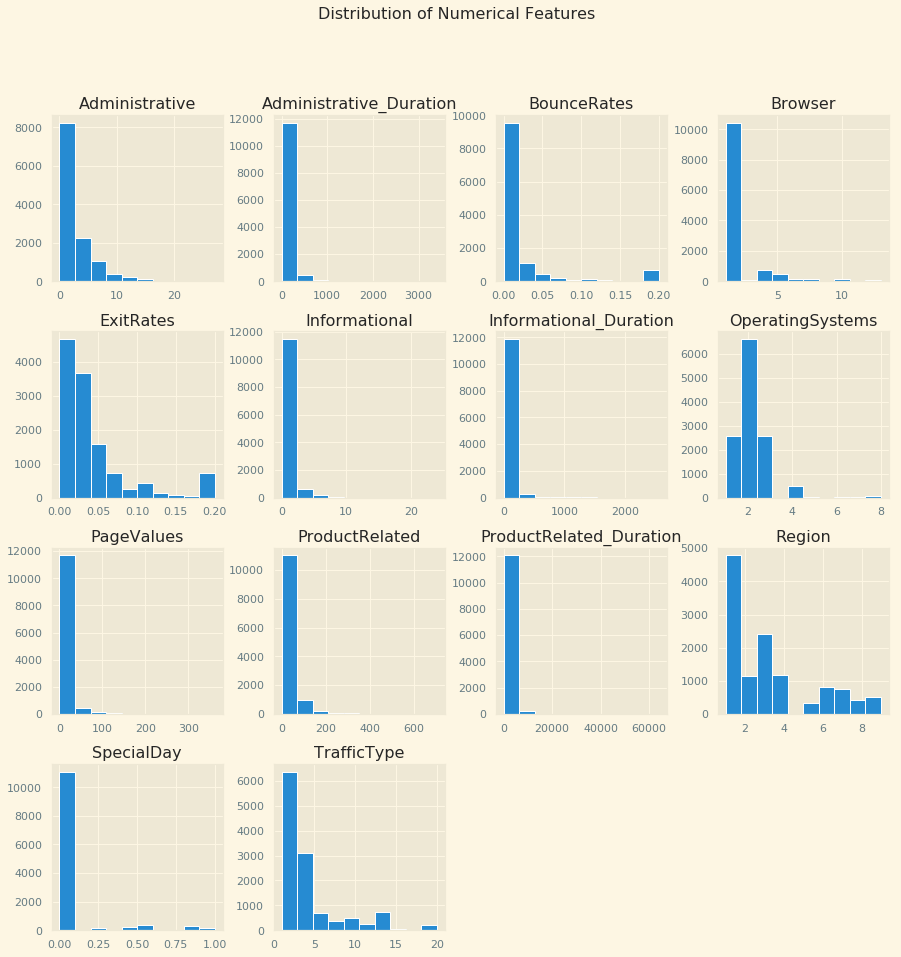

In [45]:
# show mean, standard dev for each subplot
#mu, std = norm.fit(df[column])
#title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)

# define all numeric features in new dataframe
df_nobinaryfeatures = df.drop(columns=['Revenue', 'Month', 'Weekend', 'VisitorType'])
pd.DataFrame.hist(df_nobinaryfeatures, figsize = [15,15])
plt.suptitle("Distribution of Numerical Features", fontsize=16)

## Compare Distributions Features to Target Variable
for visitors that made a transaction (=True) versus that did not make a transaction (=False)

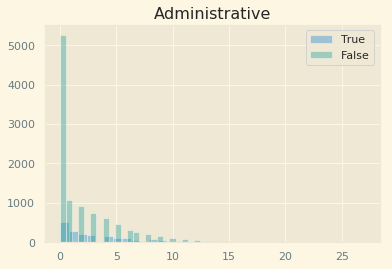

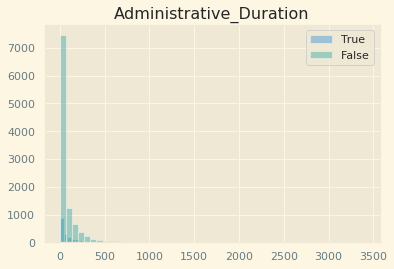

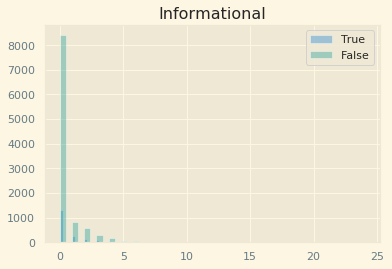

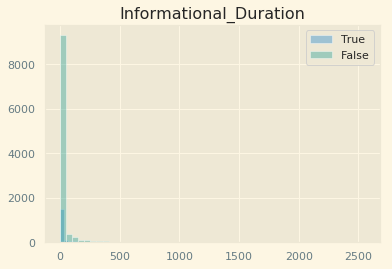

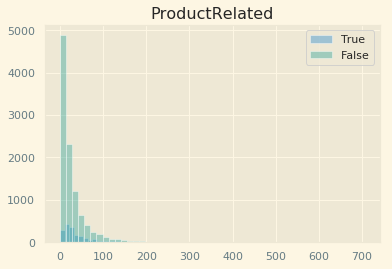

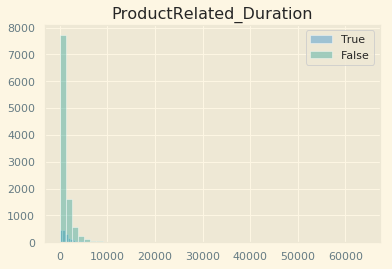

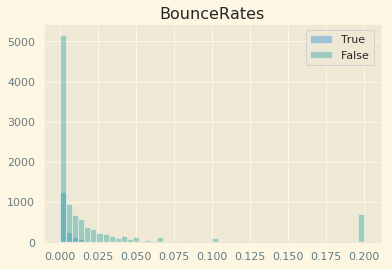

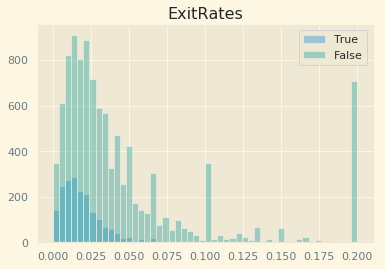

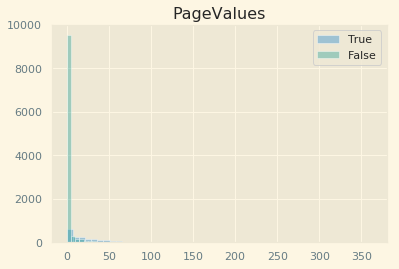

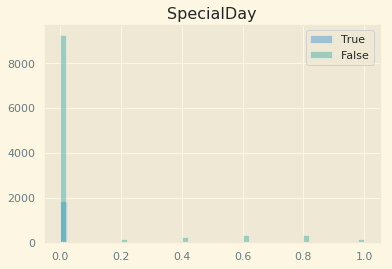

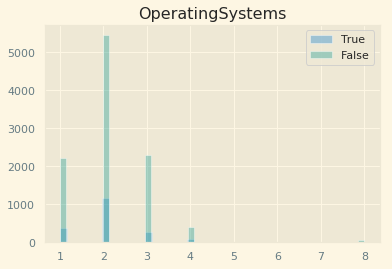

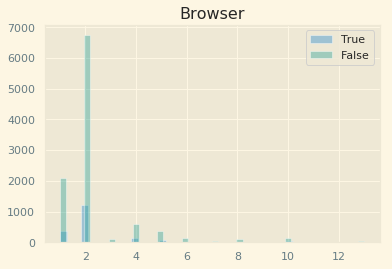

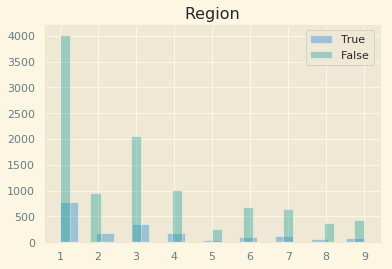

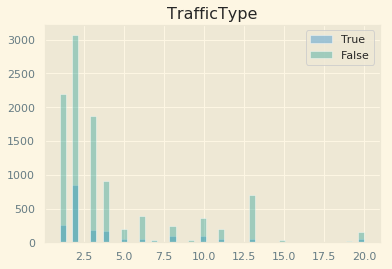

In [46]:
# visualize histograms for features with target variable
# source: https://medium.com/@davidmasse8/helpful-plotting-and-pandas-patterns-80fd82b2b88b

# drop features that are not numerical
df_1 = df.drop(columns=['Month', 'Weekend', 'VisitorType'])
# define the 1 and 0 for the target variable
yes = df_1[(df_1['Revenue'] == 1)]
no = df_1[(df_1['Revenue'] == 0)]
# define the list of features
cols = list(df_1.columns)
# remove the target variable from the list of features
cols.remove('Revenue')

# for each feature plot a histogram where the target variable is either 0 or 1
for name in cols:
    a = yes[name].values
    b = no[name].values
    sns.distplot(a, label = 'True', kde = False, rug = False)
    sns.distplot(b, label = 'False', kde = False, rug = False)
    plt.title(name)
    # show legend
    plt.legend()
    # show graph
    plt.show()

## Key Takeaway
* ExitRates and BounceRates are much smaller for visitors that made a transaction vs visitors that did not make a transaction
* ProductRelated_Duration is much smaller for visitors that made a transaction vs visitors that did not make a transaction

## Skewness ##
>* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.
* A symmetrical distribution has a skewness of zero.
* An asymmetrical distribution with a long tail to the right (higher values) has a positive skew.
* An asymmetrical distribution with a long tail to the left (lower values) has a negative skew.

In [47]:
# check the skewness of the dataframe
df.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

## Take-away
* All features seem to be highly skewed and normalization is necessary in the data preparation phase.

## Correlation Analysis (on original features)
___

In [90]:
# define correlation matrix (absolute corr values)
data_corr = df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']] 

# define a correlation matrix
corr_matrix = data_corr.corr().abs()

# show correlation matrix
#corr_matrix

In [49]:
#source:  https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
# create a function to drop the redundant pairs in the correlation matrix (all correlations are mirrored diagionaly)
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print('----------------------------------------------------')
print('Top Absolute Correlations')
print('----------------------------------------------------')
# show top 'n' correlations
get_top_abs_correlations(data_corr, n=10)

# only show correlations higher or equal to 0.5
get_top_abs_correlations(data_corr, n=10)[get_top_abs_correlations(data_corr, n=10) >= 0.5]

# Our threshold is set to 0.5 for dropping either one of the highly correlated variables

----------------------------------------------------
Top Absolute Correlations
----------------------------------------------------


BounceRates     ExitRates                  0.913004
ProductRelated  ProductRelated_Duration    0.860927
Informational   Informational_Duration     0.618955
Administrative  Administrative_Duration    0.601583
dtype: float64

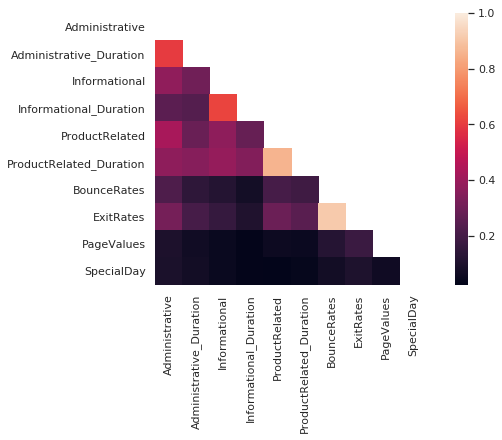

In [50]:
# heatmap without duplicates
# source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 5))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=1, square=True)

## Take-away
> 4 Continuous features are highly correlated with another feature in the dataset.
    Either these features need to be combined or 1 of the correlated features should not be included in the modeling phase.
- BounceRates with ExitRates
- ProductRelated with ProductRelated_Duration
- Informational with Informational_Duration
- Administrative with Administratie_Duration

### Correlation Analysis between categorical features

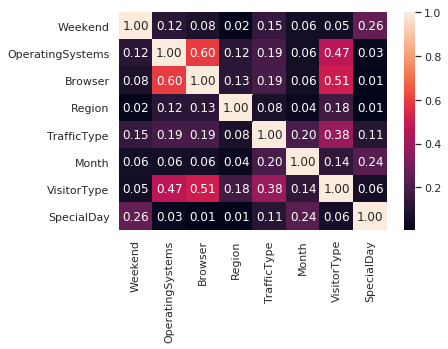

In [83]:
#pip install dython --user
from dython import nominal
# source: https://github.com/shakedzy/dython/issues/2

nominal.associations(df[['Weekend','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 'VisitorType', 'SpecialDay']], nominal_columns='all')
#nominal.associations(df, nominal_columns=['Weekend','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 'VisitorType'])
#nominal.associations(df[['PageValues', 'VisitorType']])

## Take-away
> 2 Categorical features are highly correlated with another feature in the dataset.
- OperatingSystems with Browser (60%)
- VisitorType with Browser (51%)